In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
import os
import netCDF4 as cdf
from mpl_toolkits.basemap import Basemap
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#asia   = pd.read_pickle('Asia')
#amazon = pd.read_pickle('Amazon')
#africa = pd.read_pickle('Africa')

#asia   = pd.read_pickle('Asia_0.1')
#amazon = pd.read_pickle('Amazon_0.1')
#africa = pd.read_pickle('Africa_0.1')

asia   = pd.read_pickle('Asia_new')
amazon = pd.read_pickle('Amazon_new')
africa = pd.read_pickle('Africa_new')
africa.head()

,Year,Month,Day,lat/lon G2A,lat/lon G2B,FsA,FsB,VZA G2A,VZA G2B,CF G2A,CF G2b
0,2012,12,13,"(3.777953, 26.924114)","(3.842749, 26.924495)",-0.000558775,0.00247552,0.937304,0.625585,0.305781,0.225937
1,2012,12,13,"(3.42805, 26.84802)","(3.490921, 26.843642)",-0.000968062,0.00138064,0.937056,0.626045,0.228891,0.23809
2,2012,12,13,"(3.078575, 26.769957)","(3.138603, 26.765193)",0.000702715,0.000436331,0.937064,0.626049,0.245711,0.20577
3,2012,12,13,"(2.728342, 26.695208)","(2.787209, 26.682614)",0.000144029,0.000420625,0.937329,0.625596,0.351306,0.232114
4,2012,12,13,"(-0.562172, 26.667046)","(-0.526071, 26.665401)",0.00195168,0.00240213,0.885413,0.699355,0.295196,0.117692


In [ ]:
amazon_vza_b = pd.Series(amazon['VZA G2B'].apply(to_degrees),name='Amazon - [degrees]')

/usr/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


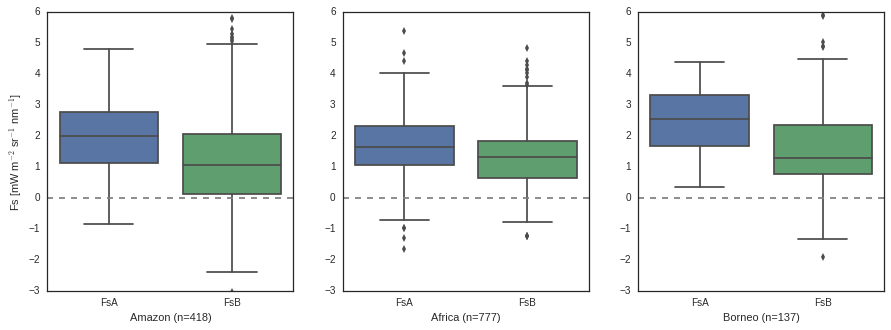

1.98149515184 1.05868598881
1.65092577179 1.30541090368
2.55566203949 1.29355870295


In [3]:
sns.set_style('white')
fig = plt.figure(1,figsize(15,5))

ax = fig.add_subplot(131)
ax = sns.boxplot((amazon[['FsA','FsB']])*1000)
ax.set(ylabel='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
ax.set(xlabel='Amazon (n=%i)'%amazon.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)

ax = fig.add_subplot(132)
ax = sns.boxplot((africa[['FsA','FsB']])*1000)
ax.set(xlabel='Africa (n=%i)'%africa.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)

ax = fig.add_subplot(133)
ax = sns.boxplot((asia[['FsA','FsB']])*1000)
ax.set(xlabel='Borneo (n=%i)'%asia.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)
sns.set(font_scale=1.2)

#fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/boxplot_tropics.png',bbox_inches='tight',DPI=1000)
plt.show()

print (amazon['FsA']*1000).median(), (amazon['FsB']*1000).median()
print (africa['FsA']*1000).median(), (africa['FsB']*1000).median()
print (asia['FsA']*1000).median(), (asia['FsB']*1000).median()

In [6]:
#amazon
amazonA = pd.Series(amazon['FsA']*1000,name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
amazonB = pd.Series(amazon['FsB']*1000,name='Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
#africa
africaA = pd.Series(africa['FsA']*1000,name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
africaB = pd.Series(africa['FsB']*1000,name='Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

asiaA   = pd.Series(asia['FsA']*1000,name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
asiaB   = pd.Series(asia['FsB']*1000,name='Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

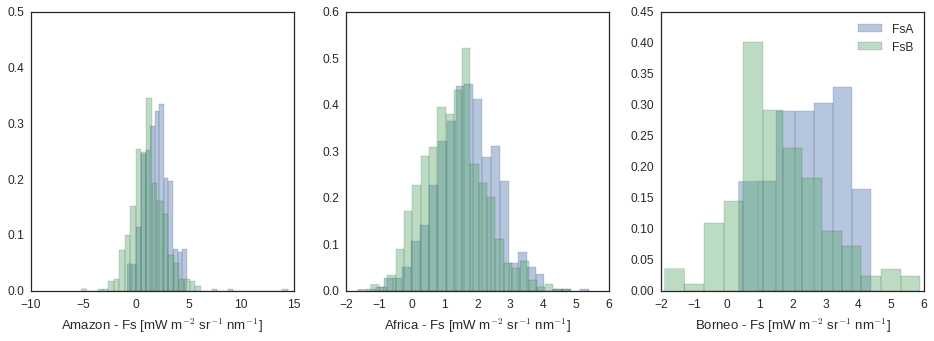

In [111]:
f  = plt.figure(1,figsize(16,5))
sns.set_style('white')
a  = f.add_subplot(131)
ax = sns.distplot(amazonA,kde=False,norm_hist=True)
ax = sns.distplot(amazonB,kde=False,norm_hist=True)
plt.ylim(0,0.5)

a  = f.add_subplot(132)
ax = sns.distplot(africaA,kde=False,norm_hist=True)
ax = sns.distplot(africaB,kde=False,norm_hist=True)

a  = f.add_subplot(133)
ax = sns.distplot(asiaA,kde=False,norm_hist=True,label='FsA')
ax = sns.distplot(asiaB,kde=False,norm_hist=True,label='FsB')
plt.legend()

plt.subplots_adjust(wspace=0.2)
#f.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/hist_tropics.png',bbox_inches='tight',DPI=1000)
plt.show()

(-3, 6)

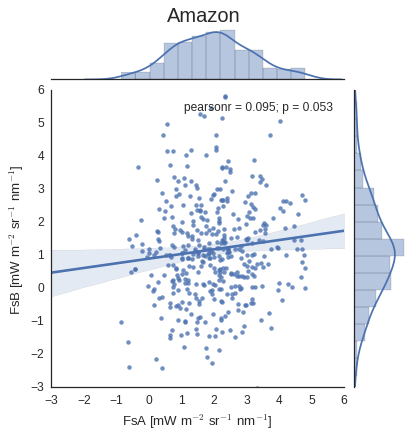

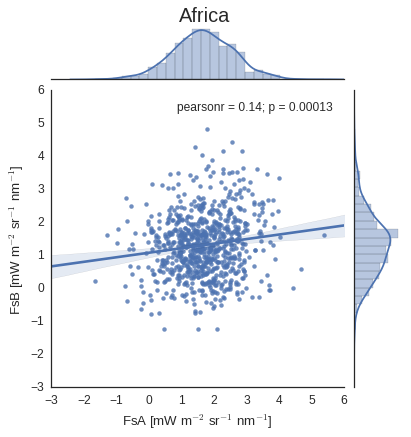

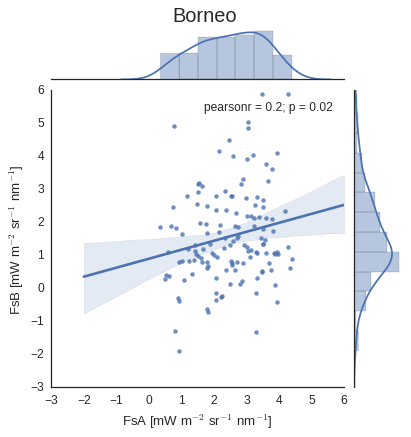

In [9]:
amazonA = pd.Series(amazon['FsA']*1000,name='FsA [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
amazonB = pd.Series(amazon['FsB']*1000,name='FsB [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
#africa
africaA = pd.Series(africa['FsA']*1000,name='FsA [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
africaB = pd.Series(africa['FsB']*1000,name='FsB [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

asiaA   = pd.Series(asia['FsA']*1000,name='FsA [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
asiaB   = pd.Series(asia['FsB']*1000,name='FsB [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

amazonA = amazonA.apply(pd.to_numeric, errors='ignore')
amazonB = amazonB.apply(pd.to_numeric, errors='ignore')

africaA = africaA.apply(pd.to_numeric, errors='ignore')
africaB = africaB.apply(pd.to_numeric, errors='ignore')

asiaA = asiaA.apply(pd.to_numeric, errors='ignore')
asiaB = asiaB.apply(pd.to_numeric, errors='ignore')


#fig = plt.figure(1,figsize(20,10))
sns.set_style('white')

ax  = fig.add_subplot(131)
ax  = sns.jointplot(amazonA,amazonB,kind='reg')
#ax  = sns.lmplot('FsA','FsB',amazon.apply(pd.to_numeric,errors='ignore'))
ax.fig.suptitle('Amazon', verticalalignment='baseline', fontsize=20)
plt.xlim(-3,6)
plt.ylim(-3,6)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_ama.png',bbox_inches='tight',DPI=1000)

ax  = fig.add_subplot(132)
ax  = sns.jointplot(africaA,africaB,kind='reg')
#ax  = sns.lmplot('FsA','FsB',africa.apply(pd.to_numeric,errors='ignore'))
ax.fig.suptitle('Africa', verticalalignment='baseline', fontsize=20)
plt.xlim(-3,6)
plt.ylim(-3,6)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_afr.png',bbox_inches='tight',DPI=1000)

ax  = fig.add_subplot(133)
ax  = sns.jointplot(asiaA,asiaB,kind='reg')
#ax  = sns.lmplot('FsA','FsB',asia.apply(pd.to_numeric,errors='ignore'))
ax.fig.suptitle('Borneo', verticalalignment='baseline', fontsize=20)
plt.xlim(-3,6)
plt.ylim(-3,6)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_born.png',bbox_inches='tight',DPI=1000)




In [113]:
from __future__ import division
import math
def to_degrees(x):
    a = math.acos(x)*(180/math.pi)
    return a

amazon_vza_a = pd.Series(amazon['VZA G2A'].apply(to_degrees),name='degrees')
amazon_vza_b = pd.Series(amazon['VZA G2B'].apply(to_degrees),name='Amazon - [degrees]')

africa_vza_a = pd.Series(africa['VZA G2A'].apply(to_degrees),name='degrees')
africa_vza_b = pd.Series(africa['VZA G2B'].apply(to_degrees),name='Africa - [degrees]')

asia_vza_a   = pd.Series(asia['VZA G2A'].apply(to_degrees),name='degrees')
asia_vza_b   = pd.Series(asia['VZA G2B'].apply(to_degrees),name='Borneo - [degrees]')

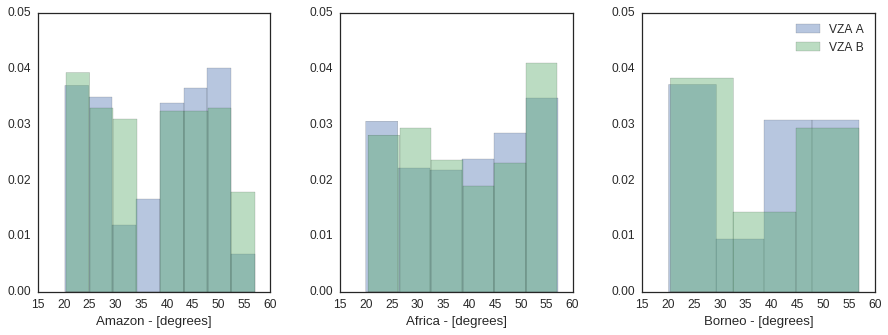

In [114]:
f = plt.figure(1,figsize(15,5))
sns.set_style('white')
a  = f.add_subplot(131)
ax = sns.distplot(amazon_vza_a,kde=False,norm_hist=True)
ax = sns.distplot(amazon_vza_b,kde=False,norm_hist=True,label='aa')
plt.ylim(0,0.05)
plt.xlim(15,60)

a  = f.add_subplot(132)
ax = sns.distplot(africa_vza_a,kde=False,bins=6,norm_hist=True)
ax = sns.distplot(africa_vza_b,kde=False,bins=6,norm_hist=True)
plt.ylim(0,0.05)
plt.xlim(15,60)

a  = f.add_subplot(133)
ax = sns.distplot(asia_vza_a,kde=False,bins=None,norm_hist=True,label='VZA A')
ax = sns.distplot(asia_vza_b,kde=False,bins=None,norm_hist=True,label='VZA B')
plt.ylim(0,0.05)
plt.xlim(15,60)
plt.legend()

plt.subplots_adjust(wspace=0.3)
fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/vza_hist_tropics.png',bbox_inches='tight',DPI=1000)
plt.show()



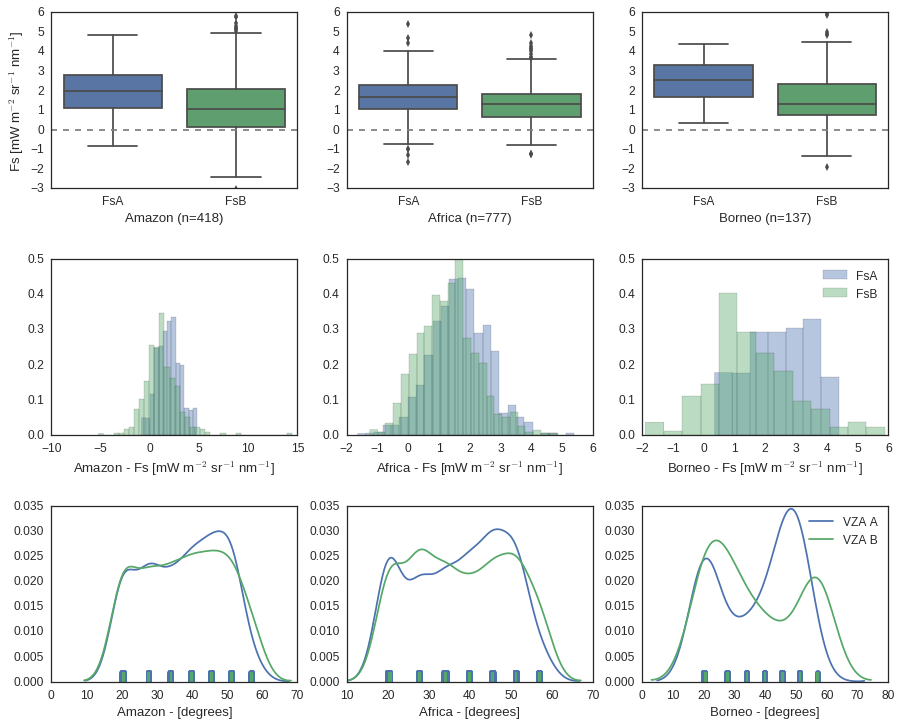

In [24]:
sns.set_style('white')
fig = plt.figure(1,figsize(15,12))

ax = fig.add_subplot(331)
ax = sns.boxplot((amazon[['FsA','FsB']])*1000)
ax.set(ylabel='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
ax.set(xlabel='Amazon (n=%i)'%amazon.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)

ax = fig.add_subplot(332)
ax = sns.boxplot((africa[['FsA','FsB']])*1000)
ax.set(xlabel='Africa (n=%i)'%africa.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)

ax = fig.add_subplot(333)
ax = sns.boxplot((asia[['FsA','FsB']])*1000)
ax.set(xlabel='Borneo (n=%i)'%asia.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)
#sns.set(font_scale=1.2)


amazonA = pd.Series(amazon['FsA']*1000,name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
amazonB = pd.Series(amazon['FsB']*1000,name='Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
#africa
africaA = pd.Series(africa['FsA']*1000,name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
africaB = pd.Series(africa['FsB']*1000,name='Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

asiaA   = pd.Series(asia['FsA']*1000,name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
asiaB   = pd.Series(asia['FsB']*1000,name='Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')


ax = fig.add_subplot(334)
ax = sns.distplot(amazonA,kde=False,norm_hist=True)
ax = sns.distplot(amazonB,kde=False,norm_hist=True)
plt.ylim(0,0.5)
ax = fig.add_subplot(335)
ax = sns.distplot(africaA,kde=False,norm_hist=True)
ax = sns.distplot(africaB,kde=False,norm_hist=True)
plt.ylim(0,0.5)
ax  = fig.add_subplot(336)
ax = sns.distplot(asiaA,kde=False,norm_hist=True,label='FsA')
ax = sns.distplot(asiaB,kde=False,norm_hist=True,label='FsB')
plt.ylim(0,0.5)
plt.legend()


amazon_vza_a = pd.Series(amazon['VZA G2A'].apply(to_degrees),name='degrees')
amazon_vza_b = pd.Series(amazon['VZA G2B'].apply(to_degrees),name='Amazon - [degrees]')

africa_vza_a = pd.Series(africa['VZA G2A'].apply(to_degrees),name='degrees')
africa_vza_b = pd.Series(africa['VZA G2B'].apply(to_degrees),name='Africa - [degrees]')

asia_vza_a   = pd.Series(asia['VZA G2A'].apply(to_degrees),name='degrees')
asia_vza_b   = pd.Series(asia['VZA G2B'].apply(to_degrees),name='Borneo - [degrees]')

ax  = fig.add_subplot(337)
#ax = sns.distplot(amazon_vza_a,kde=False,norm_hist=True)
#ax = sns.distplot(amazon_vza_b,kde=False,norm_hist=True)
ax = sns.distplot(amazon_vza_a,rug=True,hist=False,rug_kws={"lw": 6,"linestyle":'-'})
ax = sns.distplot(amazon_vza_b,rug=True,hist=False,rug_kws={"lw": 2,"linestyle":'-'})
#ax  = sns.jointplot(amazon_vza_a,amazon['FsA'],rug=True,kind='kde')
plt.ylim(0,0.035)
#plt.xlim(15,60)

ax = fig.add_subplot(338)
#ax = sns.distplot(africa_vza_a,kde=False,norm_hist=True)
#ax = sns.distplot(africa_vza_b,kde=False,norm_hist=True)
ax = sns.distplot(africa_vza_a,rug=True,hist=False,rug_kws={"lw": 6,"linestyle":'-'})
ax = sns.distplot(africa_vza_b,rug=True,hist=False,rug_kws={"lw": 2,"linestyle":'-'})

plt.ylim(0,0.035)
#plt.xlim(15,60)

ax = fig.add_subplot(339)
#ax = sns.distplot(asia_vza_a,kde=False,bins=10,norm_hist=True,label='VZA A')
#ax = sns.distplot(asia_vza_b,kde=False,bins=10,norm_hist=True,label='VZA B')
ax = sns.distplot(asia_vza_a,rug=True,hist=False,rug_kws={"lw": 6,"linestyle":'-'},label='VZA A')
ax = sns.distplot(asia_vza_b,rug=True,hist=False,rug_kws={"lw": 2,"linestyle":'-'},label='VZA B')

plt.subplots_adjust(wspace=0.2,hspace=0.4)
fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/all_stats_tropics.png',bbox_inches='tight',DPI=1000)
plt.show()



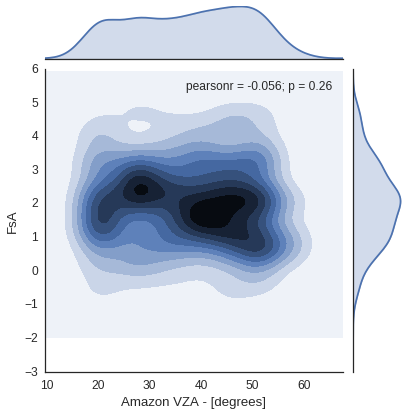

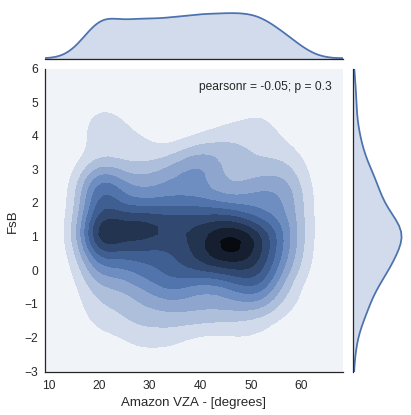

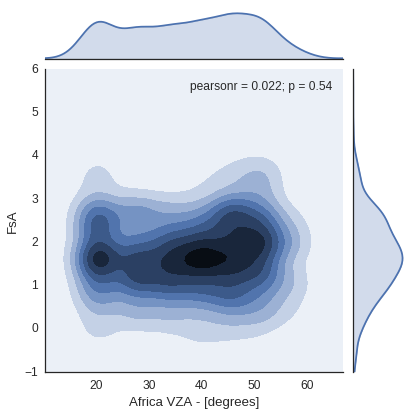

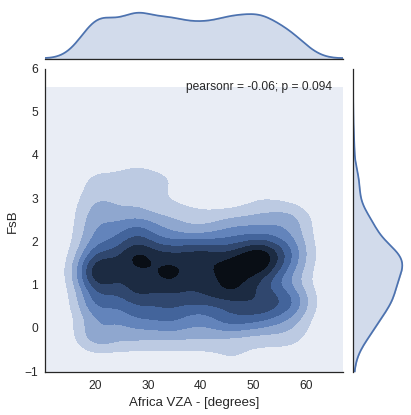

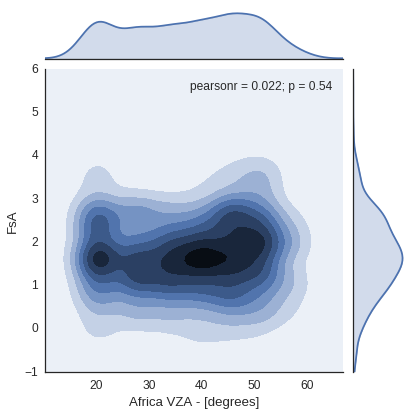

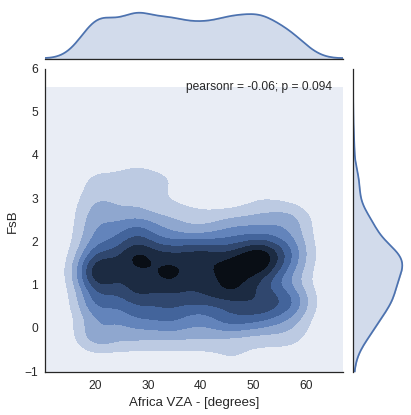

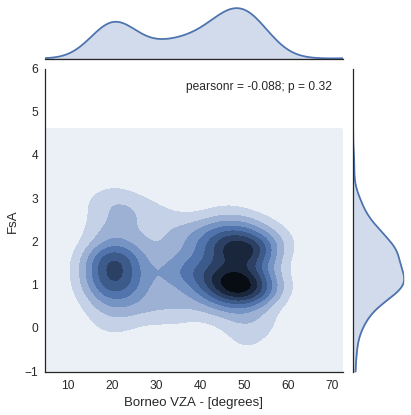

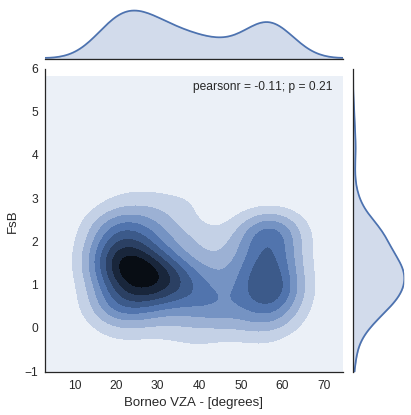

In [21]:
from __future__ import division
import math
def to_degrees(x):
    a = math.acos(x)*(180/math.pi)
    return a

amazon_vza_a = pd.Series(amazon['VZA G2A'].apply(to_degrees),name='Amazon VZA - [degrees]')
amazon_vza_b = pd.Series(amazon['VZA G2B'].apply(to_degrees),name='Amazon VZA - [degrees]')

africa_vza_a = pd.Series(africa['VZA G2A'].apply(to_degrees),name='Africa VZA - [degrees]')
africa_vza_b = pd.Series(africa['VZA G2B'].apply(to_degrees),name='Africa VZA - [degrees]')

asia_vza_a   = pd.Series(asia['VZA G2A'].apply(to_degrees),name='Borneo VZA - [degrees]')
asia_vza_b   = pd.Series(asia['VZA G2B'].apply(to_degrees),name='Borneo VZA - [degrees]')


#fig = plt.figure(1,figsize(20,10))
sns.set_style('white')

ax  = fig.add_subplot(321)
ax  = sns.jointplot(amazon_vza_a,amazon['FsA']*1000,rug=True,kind='kde')
#ax  = sns.lmplot('FsA','FsB',amazon.apply(pd.to_numeric,errors='ignore'))
plt.ylim(-3,6)

ax  = fig.add_subplot(322)
ax  = sns.jointplot(amazon_vza_b,amazon['FsB']*1000,rug=True,kind='kde')
plt.ylim(-3,6)

ax  = fig.add_subplot(323)
ax  = sns.jointplot(africa_vza_a,africa['FsA']*1000,rug=True,kind='kde')
#ax  = sns.lmplot('FsA','FsB',africa.apply(pd.to_numeric,errors='ignore'))
plt.ylim(-1,6)

ax  = fig.add_subplot(324)
ax  = sns.jointplot(africa_vza_b,africa['FsB']*1000,rug=True,kind='kde')
plt.ylim(-1,6)

ax  = fig.add_subplot(323)
ax  = sns.jointplot(africa_vza_a,africa['FsA']*1000,rug=True,kind='kde')
#ax  = sns.lmplot('FsA','FsB',africa.apply(pd.to_numeric,errors='ignore'))
plt.ylim(-1,6)

ax  = fig.add_subplot(324)
ax  = sns.jointplot(africa_vza_b,africa['FsB']*1000,rug=True,kind='kde')
plt.ylim(-1,6)

ax  = fig.add_subplot(325)
ax  = sns.jointplot(asia_vza_a,africa['FsA']*1000,rug=True,kind='kde')
#ax  = sns.lmplot('FsA','FsB',africa.apply(pd.to_numeric,errors='ignore'))
plt.ylim(-1,6)

ax  = fig.add_subplot(326)
ax  = sns.jointplot(asia_vza_b,africa['FsB']*1000,rug=True,kind='kde')
plt.ylim(-1,6)

plt.show()
#ax  = fig.add_subplot(133)
#ax  = sns.jointplot(asiaA,asia['FsA']*1000,kind='reg')


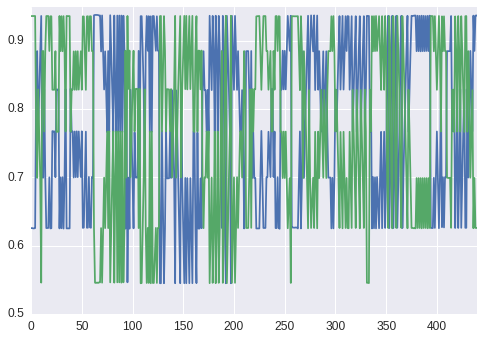

In [8]:
#plt.scatter((amazon['VZA G2A']-amazon['VZA G2B'],a)
amazon['VZA G2A'].plot()
amazon['VZA G2B'].plot()

In [13]:
from __future__ import division
import math
def to_degrees(x):
    a = math.acos(x)*(180/math.pi)
    return a

amazon_vza_a = pd.Series(amazon['VZA G2A'].apply(to_degrees),name='Amazon VZA - [degrees]')
amazon_vza_b = pd.Series(amazon['VZA G2B'].apply(to_degrees),name='Amazon VZA - [degrees]')

africa_vza_a = pd.Series(africa['VZA G2A'].apply(to_degrees),name='Africa VZA - [degrees]')
africa_vza_b = pd.Series(africa['VZA G2B'].apply(to_degrees),name='Africa VZA - [degrees]')

asia_vza_a   = pd.Series(asia['VZA G2A'].apply(to_degrees),name='Borneo VZA - [degrees]')
asia_vza_b   = pd.Series(asia['VZA G2B'].apply(to_degrees),name='Borneo VZA - [degrees]')